# Decision Trees/Regression Trees


## Introduction
In this Jupyter notebook,we will get into Decision Trees, a popular machine learning algorithm used for both classification and regression tasks. They are simple yet powerful models that mimic human decision-making processes by dividing data into distinct segments based on specific criteria.


## Datasets
For the Decision Tree Classification part, we will be working with the "load_iris Dataset." This dataset is a popular choice in machine learning for exploring classification and regression tasks, making it an excellent option for our project.

Dataset description:
- Number of Instances: The dataset contains 150 instances, each corresponding to an individual iris flower.
- Number of Attributes: There are four numeric attributes for each instance:
- sepal length (cm): The length of the sepal (outer part of the flower).
- sepal width (cm): The width of the sepal.
- petal length (cm): The length of the petal (inner part of the flower).
- petal width (cm): The width of the petal.

Target variable: The dataset includes a target variable which is the species of the iris. There are three classes:
- Iris setosa
- Iris versicolor
- Iris virginica



###  Decision Tree for Classification

We want to classify passages as survivors or non-survivors based on their information,such as age,sex,fare,etc.

In [48]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data,columns=data.feature_names)
X = X.iloc[:, [1,2]]
y = pd.Series(data.target)
print(X.head())
print(y.head())

   sepal width (cm)  petal length (cm)
0               3.5                1.4
1               3.0                1.4
2               3.2                1.3
3               3.1                1.5
4               3.6                1.4
0    0
1    0
2    0
3    0
4    0
dtype: int32


C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


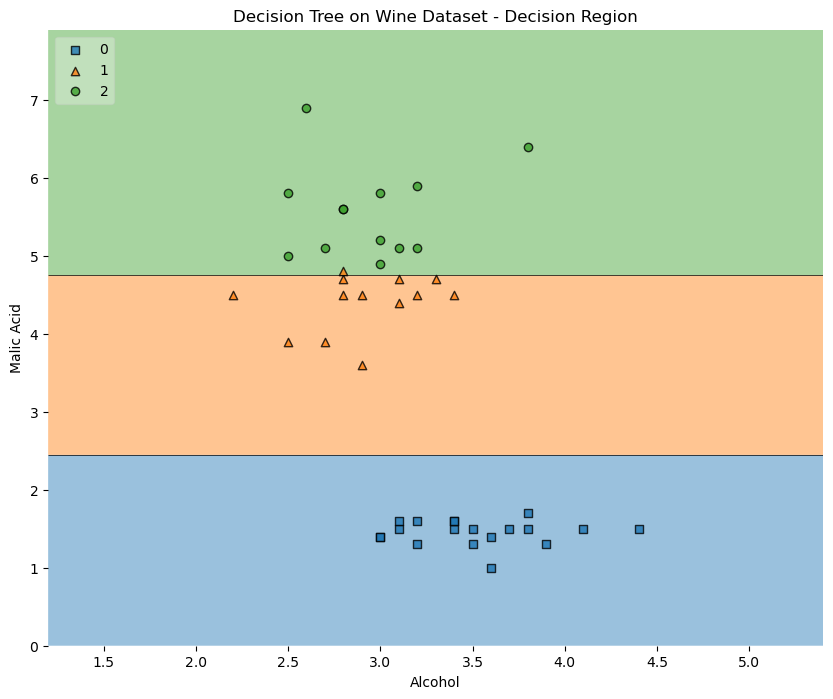

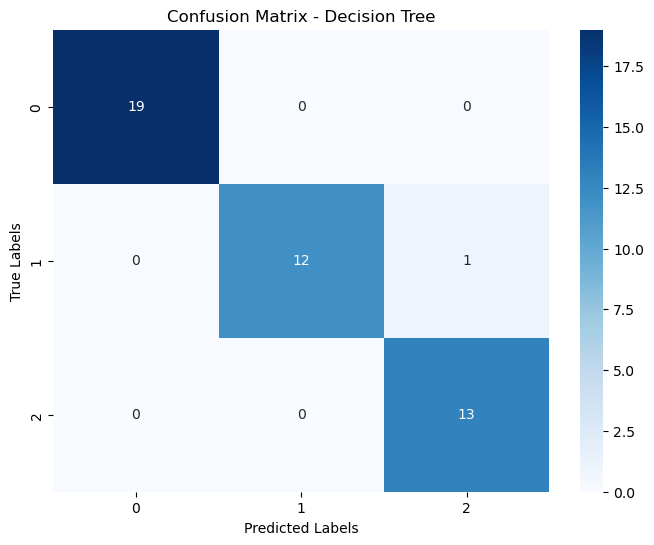

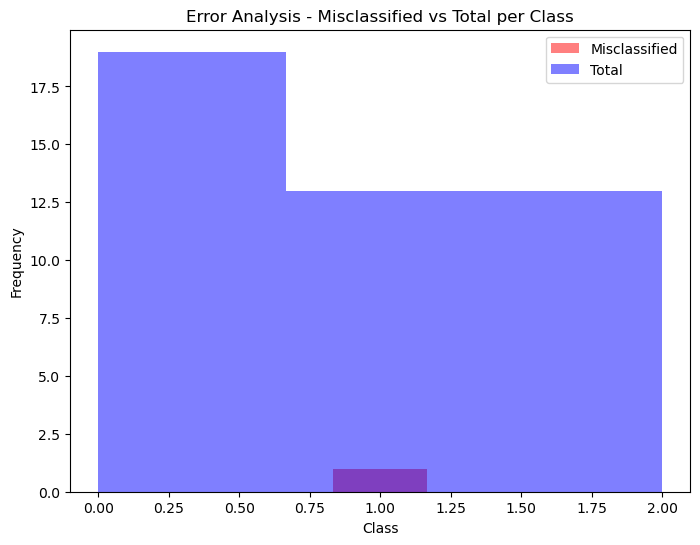

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [49]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Decision region plot
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test.values, y_test.values, clf=dt_classifier, legend=2)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Decision Tree on Wine Dataset - Decision Region')
plt.show()

# Confusion Matrix plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

# Error Analysis
errors = (y_pred != y_test)
error_rate = errors.sum() / errors.size * 100
plt.figure(figsize=(8, 6))
plt.hist(y_test[errors], bins=len(data.target_names), alpha=0.5, color='red', label='Misclassified')
plt.hist(y_test, bins=len(data.target_names), alpha=0.5, color='blue', label='Total')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Error Analysis - Misclassified vs Total per Class')
plt.legend()
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {accuracy}\n')
print('Classification Report:\n', class_report)

## Interpretation of Decision Tree Classifier Results

The decision tree classifier was applied to predict the quality of wines categorized into three classes. The model's performance was evaluated using various metrics, and the results are as follows:


### Performance Metrics
- Accuracy: 0.9777
The model accurately predicted the quality of the wines 97.77% of the time. This high accuracy indicates that the model is effective in distinguishing between the different quality classes of wine.

- Precision, Recall, and F1-Score:
1.Class 0 (Low Quality): Both precision and recall are 1 and F1-score is also 1. This suggests that the model is quite reliable in identifying low-quality wines, with a low false positive rate.

2.Class 1 (Medium Quality): Precision of 1 and recall of 0.92, yielding an F1-score of 0.96. The model shows high precision and recall for medium quality wines, indicating balanced performance in correctly identifying and not missing this class.

3.Class 2 (High Quality): Precision of 0.93 and recall of 1, with an F1-score of 0.96. For high-quality wines, the model has a moderate false positive rate but a better rate of identifying true positives.

### Conclusion
Overall, the decision tree classifier shows a strong ability to classify wines into their respective quality categories. It performs particularly well for medium quality wines. The somewhat lower precision for high-quality wines suggests that the model occasionally misclassifies wines of other qualities as high quality. Future work could focus on feature selection or model tuning to further improve the precision for high-quality wines, potentially enhancing the overall model performance.


### Performance Metrics

In our project, we will evaluate the performance of our classification models using several key metrics.

First and foremost, **"Accuracy"** measures the proportion of correctly classified instances over the total number of instances.

Additionally, the **"Classification Report"** provides a comprehensive summary of various classification metrics, including precision, recall, and F1 Score, for each class in the dataset.

The **"F1 Score"** is a metric that balances precision and recall, providing a single value that combines both aspects of a classifier's performance.

Furthermore, we will utilize the **"Confusion Matrix"** to gain insights into true positives, true negatives, false positives, and false negatives, allowing us to calculate precision, recall, and F1 Score individually for each class.

These metrics will guide us in assessing the effectiveness of our classification models and making informed decisions.

# Regression Tree
The Regression Tree model is a powerful algorithm used in supervised machine learning for predicting continuous numerical values.

Unlike classification trees that predict discrete classes, Regression Trees are tailored for regression tasks, making them well-suited for scenarios where the target variable is continuous.

These trees recursively split the dataset into subsets based on the feature that optimally reduces the variance of the target variable within each subset. The final result is a tree-like structure where leaf nodes contain predicted numerical values.

Regression Trees are known for their simplicity and interpretability, making them valuable tools for understanding the relationships between input features and continuous outcomes in various domains, such as finance, real estate, and healthcare.

### Data description
For our Decision Tree Regression project, we will be working with the "fetch_california_housing Dataset." This dataset contains valuable information about various aspects of houses, making it an ideal choice for exploring predictive modeling using Decision Trees and Regression Trees.

- MedInc: Median income in the district.
- HouseAge: Median house age in the district.
- AveRooms: Average number of rooms in houses in the district.
- AveBedrms: Average number of bedrooms in houses in the district.
- Population: Population of the district.
- AveOccup: Average occupancy per house in the district.
- Latitude and Longitude: Geographic coordinates of the district.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Load dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [2]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': range(3, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20)
}


# Cross-validation and hyperparameter tuning
regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_

# Predicting and evaluating with the best estimator
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




Best Parameters: {'max_depth': 14, 'min_samples_leaf': 16, 'min_samples_split': 2}
Mean Squared Error: 0.36826865048770974
R-squared: 0.7194229355009276


### Interpretation of Regression Tree Results
We trained a regression tree model to predict house prices, tuning the model with specific parameters for better performance. The best parameters obtained are as follows:

- Max Depth: 5
- Minimum Samples per Leaf: 5
- Minimum Samples Split: 12

These parameters were chosen to optimize the balance between model complexity and generalization ability.

### Performance Metrics
- Mean Squared Error (MSE): 2479984082435.897
  MSE measures the average squared difference between the actual and predicted prices. A lower MSE indicates a better fit of the model to the data. In our case, the MSE is relatively high, suggesting that the model's predictions deviate considerably from the actual values.

- R-squared: 0.424115469228301
  R-squared is the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.424 implies that about 42.4% of the variance in house prices is explained by our model. While not negligible, this leaves a significant portion of the variance unexplained, indicating room for improvement in model performance.


## Conclusion 
The results suggest that our regression tree model, with the chosen parameters, has moderate predictive power. The model explains a fair amount of variance in house prices, but the high MSE indicates that its predictions can be significantly off for some houses. Future work might focus on further parameter tuning, feature engineering, or exploring more complex models to improve predictions.
  